**Investigate the FBI Gun Dataset**

By : Abdelrhman Hussam Eldeen Hanafy

Physics Department

Faculty of Science, Cairo University

**Introduction**

First all, I opened the first file which was in xlsx format using the Pandas library. The file contained weapons data, their numbers, and the preparation of permits every month from 1998 to 2017. Indeed, it is a lot of data, but dealing with it was simple.
First, I calculated the highest states in purchasing weapons every month for every year, and after that I determined the highest state in purchasing weapons throughout this period and then determined the month and year, as I calculated the highest state in the purchase of weapons throughout this period.
Then I calculated which of the weapons was the most purchased throughout this long period, their numbers, and the rate at which they changed every month throughout this period. It also clarified the general trend of buying weapons
In the second file, there were statistical data on the number and classification of the population, and percentages of some groups for each state. I linked the data from the two files and calculated the per capita share of the number of weapons for each state in the file in addition to the per capita share of the total number of individuals from the total number of weapons for all states

**Questions**

1 : What is the state to appear more frequently as the top state in purchasing guns on a monthly basis from 1999 to 2016?

2 : What are the most states in purchasing guns from 1998 to 2017

3 : what is the most weapon purchasing from 1998 to 2017

4 : what is the trend of purchasing weapons

5 : what is the per capita share of the number of weapons for each state (2010 and 2016)

6 : what is the per capita share of the total number of individuals from the total number of weapons for all states (2010 and 2016)

I imported the necessary libraries to do the analysis.
Then i opened the xlsx file using pandas lib and show the first 30 element from the data and get the dimensions of the data

In [183]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import pandas as pd

In [184]:
gun_data = pd.read_excel('gun-data.xlsx') 

In [185]:
gun_data.head(30)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


In [186]:
gun_data.shape

(12485, 27)

From the previous table, it can be noticed that there are not many columns that are visible, so I have listed all the column headings

In [187]:
gun_data.columns.values

array(['month', 'state', 'permit', 'permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'], dtype=object)

In [188]:
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [189]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

Here, i have selected some columns (month,state,totals) for analysis 

In [190]:
data = gun_data[['month', 'state','totals']]

In [191]:
data.head()

,month,state,totals
0,2017-09,Alabama,32019
1,2017-09,Alaska,6303
2,2017-09,Arizona,28394
3,2017-09,Arkansas,17747
4,2017-09,California,123506


In order to facilitate the operations, I created a fuction that returns the data frame with the data required for analysis

In [192]:
import re
def year_data(year,mon) :
    month = str(mon)
    #global y
    y = 0
    if len(month) == 2:
        y = (data[data['month'] == '{}-{}'.format(year,int(month))])
    if len(month) == 1:
        y = (data[data['month'] == '{}-0{}'.format(year,int(month))])
    ff = pd.DataFrame(y)
    #country = ff.groupby("month").sum()
    return ff

Here I was doing a test for the fuction

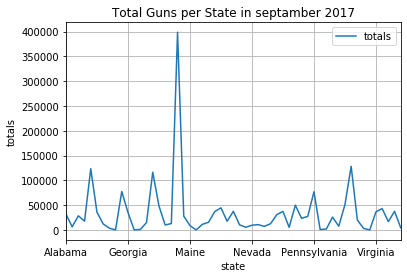

In [193]:
x = year_data(2017,9)
x.plot(x='state', y='totals')
plt.title('Total Guns per State in septamber 2017')
plt.xlabel('state')
plt.ylabel('totals')
plt.grid(True)

i build a fuction that get the important statistical values for any month in any year and print it.

Also get the data of month,state and totals then append it in a list as a tule.

In [194]:
m  = []
def detalis(year,month):
    result = year_data(year,month)

    data_list = result.iloc[:,2:3].values.tolist()

    v = max(data_list)
    max_value = data_list.index(max(data_list))
    
    data_list_state = result.iloc[:,1:2].values.tolist()
    max_state = data_list_state[max_value]

    
    arr = np.array(data_list)
    m.append((arr.max(),max_state[0],year,month))
    
    
    print("The max value is {} and is follow to {} in {}-{}".format(arr.max(),max_state[0],year,month))
    print("-"*20)
    print("some statestical values")
    print(result.describe())

all = []

for i in range(17):
    for j in range(12):
        detalis(i+2000,j+1)
    all.append(m)

The max value is 57800 and is follow to California in 2000-1
--------------------
some statestical values
             totals
count     55.000000
mean   11433.690909
std    12216.756489
min        0.000000
25%     2592.000000
50%     8619.000000
75%    14417.500000
max    57800.000000
The max value is 58905 and is follow to California in 2000-2
--------------------
some statestical values
             totals
count     55.000000
mean   12660.236364
std    12925.067204
min        0.000000
25%     2750.500000
50%    10534.000000
75%    16504.000000
max    58905.000000
The max value is 64895 and is follow to California in 2000-3
--------------------
some statestical values
             totals
count     55.000000
mean   13195.145455
std    13788.485770
min        0.000000
25%     3314.500000
50%    10773.000000
75%    17109.500000
max    64895.000000
The max value is 65796 and is follow to California in 2000-4
--------------------
some statestical values
             totals
count     55.000

The max value is 66213 and is follow to Texas in 2002-10
--------------------
some statestical values
             totals
count     55.000000
mean   15329.327273
std    14467.056805
min        0.000000
25%     5169.000000
50%    12187.000000
75%    20102.500000
max    66213.000000
The max value is 69561 and is follow to Texas in 2002-11
--------------------
some statestical values
             totals
count     55.000000
mean   16028.018182
std    15678.912357
min        0.000000
25%     4639.000000
50%    12360.000000
75%    21598.000000
max    69561.000000
The max value is 84467 and is follow to Texas in 2002-12
--------------------
some statestical values
             totals
count     55.000000
mean   17634.890909
std    17620.312358
min        0.000000
25%     4669.500000
50%    14932.000000
75%    24722.000000
max    84467.000000
The max value is 54023 and is follow to Texas in 2003-1
--------------------
some statestical values
             totals
count     55.000000
mean   11761.

max    48647.000000
The max value is 62684 and is follow to Texas in 2005-8
--------------------
some statestical values
             totals
count     55.000000
mean   12354.054545
std    12848.024548
min        0.000000
25%     3837.000000
50%     9286.000000
75%    16180.500000
max    62684.000000
The max value is 68955 and is follow to Texas in 2005-9
--------------------
some statestical values
             totals
count     55.000000
mean   14294.745455
std    14034.831678
min        0.000000
25%     4606.000000
50%    11364.000000
75%    18663.500000
max    68955.000000
The max value is 70654 and is follow to Texas in 2005-10
--------------------
some statestical values
             totals
count     55.000000
mean   15415.636364
std    14037.354191
min        0.000000
25%     5668.000000
50%    12307.000000
75%    21359.000000
max    70654.000000
The max value is 74176 and is follow to Texas in 2005-11
--------------------
some statestical values
             totals
count     55.0

              totals
count      55.000000
mean    18544.945455
std     23565.124049
min         0.000000
25%      4182.500000
50%     13159.000000
75%     24699.500000
max    148628.000000
The max value is 146516 and is follow to Kentucky in 2008-3
--------------------
some statestical values
              totals
count      55.000000
mean    18901.763636
std     23919.602137
min         0.000000
25%      4500.000000
50%     12978.000000
75%     23114.000000
max    146516.000000
The max value is 148367 and is follow to Kentucky in 2008-4
--------------------
some statestical values
              totals
count      55.000000
mean    17068.090909
std     23189.569402
min         0.000000
25%      4036.000000
50%     11607.000000
75%     20581.000000
max    148367.000000
The max value is 150272 and is follow to Kentucky in 2008-5
--------------------
some statestical values
              totals
count      55.000000
mean    16095.381818
std     22999.089287
min         0.000000
25%      3781

max    216147.000000
The max value is 219640 and is follow to Kentucky in 2010-7
--------------------
some statestical values
              totals
count      55.000000
mean    19325.200000
std     32007.393569
min         0.000000
25%      3976.500000
50%     10964.000000
75%     21873.000000
max    219640.000000
The max value is 181135 and is follow to Kentucky in 2010-8
--------------------
some statestical values
              totals
count      55.000000
mean    19679.272727
std     27831.342197
min         0.000000
25%      4940.000000
50%     13179.000000
75%     25000.000000
max    181135.000000
The max value is 172165 and is follow to Kentucky in 2010-9
--------------------
some statestical values
              totals
count      55.000000
mean    20725.090909
std     26712.599754
min         0.000000
25%      5619.500000
50%     13743.000000
75%     27014.000000
max    172165.000000
The max value is 177281 and is follow to Kentucky in 2010-10
--------------------
some statestica

max    238510.000000
The max value is 247260 and is follow to Kentucky in 2013-2
--------------------
some statestical values
              totals
count      55.000000
mean    41792.018182
std     46973.675511
min         2.000000
25%      9678.500000
50%     28356.000000
75%     56192.000000
max    247260.000000
The max value is 243253 and is follow to Kentucky in 2013-3
--------------------
some statestical values
              totals
count      55.000000
mean    39947.563636
std     45127.528113
min         0.000000
25%     10081.500000
50%     28004.000000
75%     57358.500000
max    243253.000000
The max value is 132255 and is follow to Illinois in 2013-4
--------------------
some statestical values
              totals
count      55.000000
mean    30953.727273
std     31417.308356
min         0.000000
25%      8823.000000
50%     22616.000000
75%     42955.500000
max    132255.000000
The max value is 112464 and is follow to California in 2013-5
--------------------
some statestic

max    242027.000000
The max value is 220018 and is follow to Kentucky in 2015-7
--------------------
some statestical values
              totals
count      55.000000
mean    28899.309091
std     38882.744237
min         1.000000
25%      6289.000000
50%     17259.000000
75%     33298.000000
max    220018.000000
The max value is 286463 and is follow to Kentucky in 2015-8
--------------------
some statestical values
              totals
count      55.000000
mean    31562.018182
std     45464.974127
min         1.000000
25%      7129.500000
50%     19393.000000
75%     37596.000000
max    286463.000000
The max value is 262693 and is follow to Kentucky in 2015-9
--------------------
some statestical values
              totals
count      55.000000
mean    32486.236364
std     43325.022527
min         1.000000
25%      7072.000000
50%     21775.000000
75%     41098.000000
max    262693.000000
The max value is 276162 and is follow to Kentucky in 2015-10
--------------------
some statestica

In [195]:
len(m)

204

Here, i separated the data into separate lists and then ploted the data

In [196]:
val = []
st = []
sd= []
for k in range(204):
    val.append(m[k][0])
    st.append(m[k][1])
    sd.append(m[k][2])
    #s.append(st[k][0])

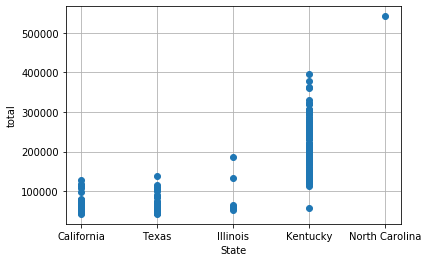

In [197]:
plt.plot(st,val,'o')
plt.xlabel('State')
plt.ylabel('total')
plt.grid(True)

This figure shows the relationship between the highest recorded states in the purchase of weapons during the months from 1999 to 2016 (on the X axis) and the number of weapons sold to these states in the same period.
This graph shows the state of Kentucky being ranked first over this period, while the state of North Carolina shows that it occupied the first place only once, with a very large and remarkable record in the purchase of weapons

1 : What is the state to appear more frequently as the top state in purchasing guns on a monthly basis from 1999 to 2016?

Answer : Kentucky

2 : What are the most states in purchasing guns from 1998 to 2017

Answer : North Carolina 

In [198]:
m[st.index('North Carolina')]

(541978, 'North Carolina', 2014, 3)

Here, I chose the columns for the types of registered weapons, I turned them into lists and then plot them in order to show which of them is the highest recorded in sales, as well as the rate of sales over the years

In [199]:
gun_type = gun_data[['month','handgun','long_gun','other','multiple']]
gun_type.fillna(value = 0,inplace = True)

lolxd = gun_type[gun_type['month'] == '2017-08']

m = gun_type['month'].tolist()
handgun = gun_type['handgun'].tolist()
long_gun = gun_type['long_gun'].tolist()
other = gun_type['other'].tolist()
multiple = gun_type['multiple'].tolist()

I did a subplot to show the average sales of each weapon over such a long period

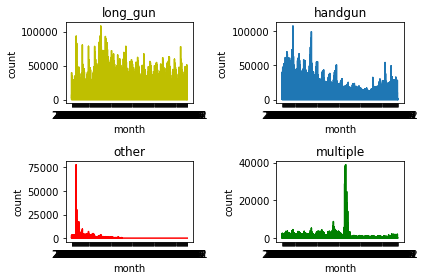

In [200]:
figure, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].plot(m,long_gun,'y')
axes[0, 0].set_title('long_gun')

axes[0, 1].plot(m,handgun)
axes[0, 1].set_title('handgun')

axes[1, 0].plot(m,other,'r')
axes[1, 0].set_title('other')

axes[1, 1].plot(m,multiple,'g')
axes[1, 1].set_title('multiple')

for ax in axes.flat:
    ax.set(xlabel='month', ylabel='count')
    
figure.tight_layout()

In this figure, it is clear that the sales of 'other' were high in a very limited period, while they decreased in the rest of the periods, as well as for the 'multiple'
As for the 'handgun', sales were high, and then gradually began to decrease until it recorded a big bottom, and then it started to rise again.
And for the 'long_gun', sales are great for the whole period

Here i plot all the data together in order to compare them

Text(0, 0.5, 'count')

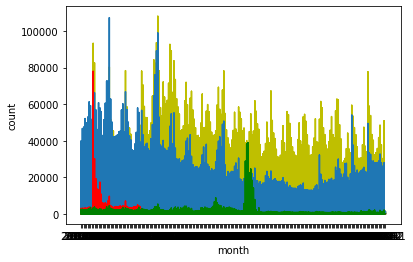

In [201]:
plt.plot(m,long_gun,'y')
plt.plot(m,handgun)
plt.plot(m,other,'r')
plt.plot(m,multiple,'g')

plt.xlabel('month')
plt.ylabel('count')

From the figure, it can be seen that the sales of 'long_gun' are higher than other types

**3 : what is the most weapon purchasing from the period**

**Answer : long_gun : 97370026**

Here, i calculated the highest guns in sales

In [202]:
guns = ['handgun','long_gun','other','multiple']
nm = []
for i in range(len(guns)):
    print("{} : {}".format(guns[i],gun_data[guns[i]].sum()))
    nm.append(gun_data[guns[i]].sum())

handgun : 74053083.0
long_gun : 97370026.0
other : 1982594.0
multiple : 3353513


Here, i calculated the total sales for each month and displayed it to show us the rate of sales throughout the above-mentioned period

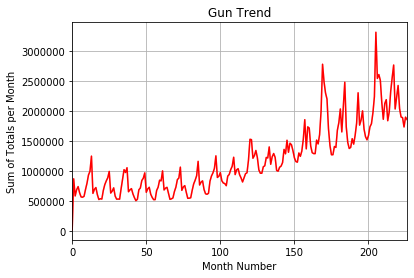

In [203]:
import seaborn as sns
gun_trend = gun_data.groupby(['month'])['totals'].sum()
ax = sns.tsplot(data = gun_trend, err_style="unit_traces",color='red');
plt.title('Gun Trend')
plt.xlabel('Month Number')
plt.ylabel('Sum of Totals per Month')
plt.grid(True)

In this figure, it is clear that sales have taken an almost regular upward trend in the purchase of weapons, but in recent months it is possible to notice a decrease in sales and are still decreasing.

**4 : what is the trend of purchasing weapons**

**Answer: As seen above figure that the rate of weapons purchases increased annually throughout this period, but it can be noticed that in recent years the rate of purchase began to decrease.**

Here, I began to open the second file, which contains the data of citizens and their classification according to ages and races in 50 states

In [204]:
us_data = pd.read_csv('u.s.-census-data.csv')
us_data.head(30)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [205]:
us_data.columns.values

array(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

It is important to ensure that there are NaN values in the data

In [206]:
us_data[60:]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Data Cleaning**

It is noticeable that there are NaN values in the data, so I removed them completely from the data to make the analysis process easier. I also removed the 'Fact Note' and 'index' columns because I didn't need it. I also changed the name of the column 'Fact' to 'state' and then displayed the data

In [207]:
#drop cells that contains NaN values 
us_data = us_data.drop(us_data.index[65:85]).reset_index()

In [208]:
#rename Fact column to state
us_data = us_data.rename(columns={'Fact':'state'})

In [209]:
#drop fact note and index columns becouse i did not use it
us_data = us_data.drop(['Fact Note','index'], axis =1 )

In [210]:
us_data.head()

,state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


Here, i have collected the names of the 50 states in the file in order to compare them with the 55 states in the first file.

In [211]:
fact = us_data['state'].tolist()

I made a transpose of the data so that it was easier to deal with

In [212]:
#transpose data
us_data_trans = us_data.T
us_data_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""


In [213]:
us_data_trans.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64],
      dtype=int64)

Here i have listed all the facts for each state so I can replace them as column names

In [214]:
lolxd = us_data_trans[0:1]

In [215]:
l,d = lolxd.shape

In [216]:
new_col = []
for i in range(65):
    print(i,lolxd[i].to_string().lstrip('state'))
    new_col.append(lolxd[i].to_string().lstrip('state'))
    print('-'*100)

0     Population estimates, July 1, 2016,  (V2016)
----------------------------------------------------------------------------------------------------
1     Population estimates base, April 1, 2010,  (V2...
----------------------------------------------------------------------------------------------------
2     Population, percent change - April 1, 2010 (es...
----------------------------------------------------------------------------------------------------
3     Population, Census, April 1, 2010
----------------------------------------------------------------------------------------------------
4     Persons under 5 years, percent, July 1, 2016, ...
----------------------------------------------------------------------------------------------------
5     Persons under 5 years, percent, April 1, 2010
----------------------------------------------------------------------------------------------------
6     Persons under 18 years, percent, July 1, 2016,...
---------------------------

----------------------------------------------------------------------------------------------------
57     Women-owned firms, 2012
----------------------------------------------------------------------------------------------------
58     Minority-owned firms, 2012
----------------------------------------------------------------------------------------------------
59     Nonminority-owned firms, 2012
----------------------------------------------------------------------------------------------------
60     Veteran-owned firms, 2012
----------------------------------------------------------------------------------------------------
61     Nonveteran-owned firms, 2012
----------------------------------------------------------------------------------------------------
62     Population per square mile, 2010
----------------------------------------------------------------------------------------------------
63     Land area in square miles, 2010
-------------------------------------------

In [217]:
us_data_trans.columns  = new_col

In [218]:
us_data_trans.head()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""


In [219]:
us_data_trans = us_data_trans.drop(['state'])

In [220]:
us_data_trans.head()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [221]:
us_data_trans.describe()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
count,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
unique,50,50,45,50,29,29,43,40,39,40,...,50,50,50,50,50,50,50,49,50,50
top,"7,288,000","1,853,011",1.70%,"1,328,361",6.40%,6.50%,22.80%,24.40%,15.00%,13.80%,...,"227,156","253,533","89,159","5,777",83857,"57,996","800,585",153.9,"30,842.92","""51"""
freq,1,1,3,1,6,4,3,3,4,4,...,1,1,1,1,1,1,1,2,1,1


In [222]:
us_data_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 65 columns):
    Population estimates, July 1, 2016,  (V2016)         50 non-null object
    Population estimates base, April 1, 2010,  (V2...    50 non-null object
    Population, percent change - April 1, 2010 (es...    50 non-null object
    Population, Census, April 1, 2010                    50 non-null object
    Persons under 5 years, percent, July 1, 2016, ...    50 non-null object
    Persons under 5 years, percent, April 1, 2010        50 non-null object
    Persons under 18 years, percent, July 1, 2016,...    50 non-null object
    Persons under 18 years, percent, April 1, 2010       50 non-null object
    Persons 65 years and over, percent,  July 1, 2...    50 non-null object
    Persons 65 years and over, percent, April 1, 2010    50 non-null object
    Female persons, percent,  July 1, 2016,  (V2016)     50 non-null object
    Female persons, percent, April 1, 2010             

Here, the data is prepared for the years 2010 and 2016 in order to be compared between them to answer the questions.

In [223]:
data_person_2016 = us_data_trans[new_col[0]].tolist()

data_2016 = year_data(2016,7) #use year_data function to return the month,state,totals data of april 2010
#convert the data from dataframe to lists
data_month_2016 = data_2016['month'].tolist()
data_total_2016 = data_2016['totals'].tolist()
data_state_2016 = data_2016['state'].tolist()

In [224]:
#create data frame contains month,state and totals
data_dic = {'month':data_month_2016,'state':data_state_2016,'totals':data_total_2016}
com_2016 = pd.DataFrame(data_dic,index=data_state_2016)
#drop the states that did not exist in the second file
com_2016 = com_2016.drop(['District of Columbia','Guam','Mariana Islands','Puerto Rico','Virgin Islands'])

In [225]:
#convert the data from dataframe to lists
data_month_2016 = com_2016['month'].tolist()
data_total_2016 = com_2016['totals'].tolist()
data_state_2016 = com_2016['state'].tolist()

In [226]:
data_person_2010 = us_data_trans[new_col[1]].tolist()

data_2010 = year_data(2010,4) #use year_data function to return the month,state,totals data of april 2010
#convert the data from dataframe to lists
data_month_2010 = data_2010['month'].tolist()
data_total_2010 = data_2010['totals'].tolist()
data_state_2010 = data_2010['state'].tolist()

In [227]:
#create data frame contains month,state and totals
data_dic = {'month':data_month_2010,'state':data_state_2010,'totals':data_total_2010}
com_2010 = pd.DataFrame(data_dic,index=data_state_2010)
#drop the states that did not exist in the second file
com_2010 = com_2010.drop(['District of Columbia','Guam','Mariana Islands','Puerto Rico','Virgin Islands'])

In [228]:
#convert the data from dataframe to lists
data_month_2010 = com_2010['month'].tolist()
data_total_2010 = com_2010['totals'].tolist()
data_state_2010 = com_2010['state'].tolist()

In [229]:
# function to calculate the precent of guns per person
def percent(x,y):
    per = []
    for i in range(len(x)):
        per.append(x[i]/int(y[i].replace(',','')))
    return per

In [230]:
#describe the result data for 2010
data_dic = {'state':data_state_2010,'total_2010':data_total_2010,new_col[1].strip():data_person_2010}
com_data_2010 = pd.DataFrame(data_dic,index=data_month_2010)
com_data_2010.head()

,state,total_2010,"Population estimates base, April 1, 2010, (V2..."
2010-04,Alabama,20791,"4,780,131"
2010-04,Alaska,6411,"710,249"
2010-04,Arizona,16578,"6,392,301"
2010-04,Arkansas,14563,"2,916,025"
2010-04,California,80750,"37,254,522"


In [231]:
com_per_2010 = percent(data_total_2010,data_person_2010)

In [232]:
#add new column
com_data_2010['total per person'] = com_per_2010

5 : what is the per capita share of the number of weapons for each state (2010 and 2016)

Answer : The results can be observed through the following table

In [233]:
#describe the result data for 2010
com_data_2010.sort_values("total per person", axis = 0, ascending = False, inplace = True) 
com_data_2010.head()

,state,total_2010,"Population estimates base, April 1, 2010, (V2...",total per person
2010-04,Kentucky,211261,"4,339,344",0.048685
2010-04,Utah,109391,"2,763,888",0.039579
2010-04,Alaska,6411,"710,249",0.009026
2010-04,Montana,8367,"989,414",0.008457
2010-04,Wyoming,4013,"563,767",0.007118


6 : what is the per capita share of the total number of individuals from the total number of weapons for all states (2010)

0.26704019777301546

In [234]:
per_total_2010 = sum(com_per_2010)
per_total_2010

0.26704019777301546

In [235]:
######################################################################

5 : what is the per capita share of the number of weapons for each state (2016) 

Answer : The results can be observed through the following table

In [236]:
#describe the result data for 2016
data_dic = {'state':data_state_2016,'total_2016':data_total_2016,new_col[0].strip():data_person_2016}
com_data_2016 = pd.DataFrame(data_dic,index=data_month_2016)
com_data_2016.head()

,state,total_2016,"Population estimates, July 1, 2016, (V2016)"
2016-07,Alabama,48927,"4,863,300"
2016-07,Alaska,6793,"741,894"
2016-07,Arizona,34496,"6,931,071"
2016-07,Arkansas,19378,"2,988,248"
2016-07,California,190218,"39,250,017"


In [237]:
com_per_2016 = percent(data_total_2016,data_person_2016)

In [238]:
#add new column
com_data_2016['total per person'] = com_per_2016

In [239]:
#describe the result data for 2016
com_data_2016.sort_values("total per person", axis = 0, ascending = False, inplace = True) 
com_data_2016.head()

,state,total_2016,"Population estimates, July 1, 2016, (V2016)",total per person
2016-07,Kentucky,363085,"4,436,974",0.081832
2016-07,Indiana,88340,"6,633,053",0.013318
2016-07,Illinois,168227,"12,801,539",0.013141
2016-07,Alabama,48927,"4,863,300",0.010060
2016-07,New Hampshire,13068,"1,334,795",0.009790


6 : what is the per capita share of the total number of individuals from the total number of weapons for all states (2016)

Answer : 0.3861327362868589

In [240]:
per_total_2016 = sum(com_per_2016)
per_total_2016

0.3861327362868589

**Conclusions**

The results can be summarized in this project. It contains two files. The first file contains sales data during the period from 1998 to 2017 in a state. In this file it became clear that the state with the highest sales of weapons during this period was the state of Kentucky, where the state was the most occupying first place during the mentioned period, while the state of North Carolina scored first place once, but with a very large number of sales, and the highest weapon in sales was 'long_gun' while Comes in second place 'hand-gun'. It also became clear that the trend to buy weapons was rising for a long time, but in recent months the factory began to decline significantly.
In the second file it contained data for citizens and their classification according to age and race for each state. In this file, I calculated the per capita half of each state in the weapons registered in the same state in 2010 and 2016, and I also calculated the per capita half of all weapons registered in all states in the same two years and the ratio was 0.26 and 0.38 respectively.

The first file was easier to deal with than the second file, which had a lot of problems, such as the nan values, and the second file contained a lot of data and classifications that were not used and it took a lot of time to choose the appropriate data and link it to the first file. It was also difficult to deal with two different files. The second file could only have been confined to data for the years 2010 and 2016 to facilitate the analysis process, or more data could be given for other years, not only limited to these two years.
It is also noticeable that the number of states in the first file was 55, while in the second file it was 50, and this complicated the merging of the two files' data, so the solution was to drop the excess states from the first file in order to match the second file so that the comparison could be done correctly.